In [13]:
import mygene
from tqdm import tqdm
import pandas as pd

In [14]:
count_matrix = pd.read_csv('/12tb_dsk1/danish//Gene_Regulatory_Network_ROSMAP/code/preprocessing_18_dec/count_matrix_AD_NCI_raw.csv',index_col=0)

In [15]:
count_matrix

,23_120411,591_120522,943_131101,604_120523,545_120516,364_120502,705_120605,711_120531,602_120523,229_120425,...,882_130918,587_120522,168_120423,954_131107,283_120430,677_120604,142_120419,120_120418,483_120515,174_120424
ENSG00000182870,1865,1941,1261,2178,824,1448,1475,1132,3065,1063,...,1392,1811,2634,672,2170,923,1530,1015,3054,1025
ENSG00000039523,2180,2544,2339,2850,1033,1722,1664,1477,3414,1087,...,2126,1893,2444,1295,2051,1085,1992,1551,2988,1526
ENSG00000198142,83,116,218,177,51,53,75,106,105,43,...,224,64,57,195,54,69,76,84,72,95
ENSG00000182366,42,45,53,79,14,47,35,28,89,17,...,17,31,89,2,37,15,9,9,121,4
ENSG00000168490,11584,19678,15168,23290,4935,8611,8229,7415,21563,8881,...,10643,11961,21087,3432,16578,5067,13165,8362,26542,5002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000143590,325,372,431,430,265,347,319,248,498,263,...,317,423,371,191,356,184,276,267,374,254
ENSG00000134824,5240,3940,4211,4877,2089,2857,2746,6162,4732,1929,...,7420,1689,2960,4846,2722,2762,3501,3266,4627,5730
ENSG00000127586,435,420,371,1025,222,304,283,234,439,213,...,321,263,484,199,422,183,447,348,432,253
ENSG00000104915,710,838,1019,1135,546,725,813,653,1093,543,...,1008,866,739,649,667,480,605,910,797,892


In [16]:
AD_filtered_data = pd.read_csv('../AD_filtered_data.csv', index_col=0)

In [17]:
import pickle

# Step 4: Load the list from the pickle file
with open('../cluster_list.pkl', 'rb') as file:
    cluster_list = pickle.load(file)

print("List loaded from my_list.pkl:")
print(cluster_list)

List loaded from my_list.pkl:
[['23_120411.csv', '193_120424.csv', '76_120417.csv', '197_120424.csv', '326_120501.csv', '628_120524.csv', '520_120515.csv', '214_120425.csv', '497_120515.csv', '228_120425.csv', '350_120501.csv', '363_120502.csv', '637_120524.csv', '232_120425.csv', '429_120507.csv', '56_120417.csv', '444_120507.csv', '292_120430.csv', '494_120515.csv', '304_120430.csv', '34_120416.csv', '181_120424.csv', '231_120425.csv', '703_120605.csv', '355_120501.csv', '482_120514.csv', '952_131107.csv', '704_120605.csv', '531_120516.csv', '309_120430.csv', '02_120405.csv', '173_120424.csv', '407_120503.csv', '649_120529.csv', '434_120507.csv', '635_120524.csv', '942_131101.csv', '689_120604.csv'], ['243_120426.csv', '424_120507.csv', '36_120416.csv', '323_120501.csv', '24_120411.csv', '721_120531.csv', '607_120523.csv', '604_120523.csv', '286_120430.csv', '12_120410.csv', '77_120417.csv', '591_120522.csv', '715_120531.csv', '459_120514.csv', '202_120424.csv', '711_120531.csv', '70

In [18]:
count_matrix = count_matrix.T 

In [19]:
def return_cluster(name):
    name = name + '.csv'

    if name in cluster_list[0]:
        return 'A'
    elif name in cluster_list[1]:
        return 'B'
    elif name in cluster_list[2]:
        return 'C'
    else:
        return 'NCI'
    

In [20]:
x = []
for i in count_matrix.index:
    x.append(return_cluster(i))

In [21]:
meta_data = pd.DataFrame(x, columns=["condition"], index=count_matrix.index)

In [23]:
meta_data

,condition
23_120411,A
591_120522,B
943_131101,NCI
604_120523,B
545_120516,C
...,...
677_120604,NCI
142_120419,NCI
120_120418,NCI
483_120515,NCI


In [24]:
meta_data.condition.value_counts()

condition
NCI    97
A      38
B      33
C      20
Name: count, dtype: int64

In [12]:
count_matrix

,23_120411,591_120522,943_131101,604_120523,545_120516,364_120502,705_120605,711_120531,602_120523,229_120425,...,882_130918,587_120522,168_120423,954_131107,283_120430,677_120604,142_120419,120_120418,483_120515,174_120424
ENSG00000182870,1865,1941,1261,2178,824,1448,1475,1132,3065,1063,...,1392,1811,2634,672,2170,923,1530,1015,3054,1025
ENSG00000039523,2180,2544,2339,2850,1033,1722,1664,1477,3414,1087,...,2126,1893,2444,1295,2051,1085,1992,1551,2988,1526
ENSG00000198142,83,116,218,177,51,53,75,106,105,43,...,224,64,57,195,54,69,76,84,72,95
ENSG00000182366,42,45,53,79,14,47,35,28,89,17,...,17,31,89,2,37,15,9,9,121,4
ENSG00000168490,11584,19678,15168,23290,4935,8611,8229,7415,21563,8881,...,10643,11961,21087,3432,16578,5067,13165,8362,26542,5002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000143590,325,372,431,430,265,347,319,248,498,263,...,317,423,371,191,356,184,276,267,374,254
ENSG00000134824,5240,3940,4211,4877,2089,2857,2746,6162,4732,1929,...,7420,1689,2960,4846,2722,2762,3501,3266,4627,5730
ENSG00000127586,435,420,371,1025,222,304,283,234,439,213,...,321,263,484,199,422,183,447,348,432,253
ENSG00000104915,710,838,1019,1135,546,725,813,653,1093,543,...,1008,866,739,649,667,480,605,910,797,892


In [28]:
count_matix = count_matrix.T
count_matix 

,23_120411,591_120522,943_131101,604_120523,545_120516,364_120502,705_120605,711_120531,602_120523,229_120425,...,882_130918,587_120522,168_120423,954_131107,283_120430,677_120604,142_120419,120_120418,483_120515,174_120424
ENSG00000182870,1865,1941,1261,2178,824,1448,1475,1132,3065,1063,...,1392,1811,2634,672,2170,923,1530,1015,3054,1025
ENSG00000039523,2180,2544,2339,2850,1033,1722,1664,1477,3414,1087,...,2126,1893,2444,1295,2051,1085,1992,1551,2988,1526
ENSG00000198142,83,116,218,177,51,53,75,106,105,43,...,224,64,57,195,54,69,76,84,72,95
ENSG00000182366,42,45,53,79,14,47,35,28,89,17,...,17,31,89,2,37,15,9,9,121,4
ENSG00000168490,11584,19678,15168,23290,4935,8611,8229,7415,21563,8881,...,10643,11961,21087,3432,16578,5067,13165,8362,26542,5002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000143590,325,372,431,430,265,347,319,248,498,263,...,317,423,371,191,356,184,276,267,374,254
ENSG00000134824,5240,3940,4211,4877,2089,2857,2746,6162,4732,1929,...,7420,1689,2960,4846,2722,2762,3501,3266,4627,5730
ENSG00000127586,435,420,371,1025,222,304,283,234,439,213,...,321,263,484,199,422,183,447,348,432,253
ENSG00000104915,710,838,1019,1135,546,725,813,653,1093,543,...,1008,866,739,649,667,480,605,910,797,892


In [29]:
count_matrix.to_csv('count_matrix_diff_analysis.csv', index=True)
meta_data.to_csv('meta_data_diff_analysis.csv', index=True)

In [26]:
count_matrix

,ENSG00000182870,ENSG00000039523,ENSG00000198142,ENSG00000182366,ENSG00000168490,ENSG00000122042,ENSG00000139620,ENSG00000133641,ENSG00000273604,ENSG00000213246,...,ENSG00000170703,ENSG00000185813,ENSG00000104611,ENSG00000115875,ENSG00000181524,ENSG00000143590,ENSG00000134824,ENSG00000127586,ENSG00000104915,ENSG00000151611
23_120411,1865,2180,83,42,11584,1505,186,265,594,507,...,30,1668,43,1277,20,325,5240,435,710,126
591_120522,1941,2544,116,45,19678,2265,292,458,574,721,...,84,2136,51,1605,46,372,3940,420,838,217
943_131101,1261,2339,218,53,15168,3382,484,783,568,857,...,39,2415,38,3452,73,431,4211,371,1019,258
604_120523,2178,2850,177,79,23290,3105,413,617,984,893,...,95,2658,33,2055,63,430,4877,1025,1135,194
545_120516,824,1033,51,14,4935,762,131,101,265,308,...,21,1183,30,685,18,265,2089,222,546,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677_120604,923,1085,69,15,5067,996,113,219,241,345,...,21,960,57,514,13,184,2762,183,480,106
142_120419,1530,1992,76,9,13165,1133,185,296,938,482,...,31,1458,31,1090,11,276,3501,447,605,106
120_120418,1015,1551,84,9,8362,1147,161,213,285,435,...,25,1294,35,1028,29,267,3266,348,910,152
483_120515,3054,2988,72,121,26542,2626,323,591,1064,769,...,69,2298,32,1888,33,374,4627,432,797,209


In [27]:
meta_data

,condition
23_120411,A
591_120522,B
943_131101,NCI
604_120523,B
545_120516,C
...,...
677_120604,NCI
142_120419,NCI
120_120418,NCI
483_120515,NCI


# Run Differential expression analysis and then come back here for result analysis of differential expression analysis

In [30]:
result_analysis_A_NCI = pd.read_csv('./differential_expression_output/A_NCI//results.csv', index_col=0)
result_analysis_B_NCI = pd.read_csv('./differential_expression_output/B_NCI//results.csv', index_col=0)
result_analysis_C_NCI = pd.read_csv('./differential_expression_output/C_NCI//results.csv', index_col=0)

In [31]:
result_analysis_A_NCI.sort_values(by='padj').head(40)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000198830,1485.955686,0.533714,0.078998,6.756001,1.418520e-11,2.458296e-07
ENSG00000170791,478.407609,0.404535,0.061226,6.607289,3.914228e-11,3.391678e-07
ENSG00000171476,2792.304566,0.438892,0.070718,6.206227,5.427171e-10,3.135095e-06
ENSG00000248714,30.427969,-0.774772,0.126889,-6.105902,1.022218e-09,4.428761e-06
ENSG00000114126,1348.555461,-0.423537,0.071416,-5.930596,3.018374e-09,9.105472e-06
ENSG00000053702,421.867211,-0.464536,0.078423,-5.923453,3.152500e-09,9.105472e-06
ENSG00000073756,103.729993,1.101567,0.189106,5.825128,5.706885e-09,1.412862e-05
ENSG00000165175,2580.063233,-0.634260,0.110725,-5.728268,1.014612e-08,2.032526e-05
ENSG00000160991,2177.802745,-0.537222,0.094459,-5.687368,1.290120e-08,2.032526e-05
ENSG00000106665,6196.837458,-0.355829,0.062539,-5.689742,1.272313e-08,2.032526e-05


In [34]:
result_analysis_A_NCI[result_analysis_A_NCI.padj<=0.05]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000122042,2050.815318,0.168108,0.061351,2.740110,6.141857e-03,0.030959
ENSG00000139620,261.795360,0.147467,0.056489,2.610541,9.039921e-03,0.039772
ENSG00000133641,418.685015,0.412746,0.077004,5.360055,8.319666e-08,0.000063
ENSG00000119414,1032.455867,0.185677,0.053509,3.470021,5.204181e-04,0.006858
ENSG00000184428,441.392109,-0.293100,0.069938,-4.190853,2.779081e-05,0.001364
...,...,...,...,...,...,...
ENSG00000274751,34.263565,-0.466556,0.136354,-3.421654,6.224145e-04,0.007538
ENSG00000279951,44.461714,-0.450576,0.120716,-3.732545,1.895545e-04,0.003716
ENSG00000184221,2977.971638,-0.348103,0.128523,-2.708493,6.758959e-03,0.033023
ENSG00000115875,1512.677181,0.225737,0.060097,3.756234,1.724895e-04,0.003496


In [35]:
result_analysis_B_NCI[result_analysis_B_NCI.padj<=0.05]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000198142,105.424311,-0.262326,0.109689,-2.391550,1.677739e-02,0.036002
ENSG00000182366,38.349397,0.471879,0.171246,2.755554,5.859281e-03,0.014858
ENSG00000168490,12765.372346,0.354554,0.112930,3.139598,1.691800e-03,0.005266
ENSG00000122042,1934.990767,0.258621,0.062172,4.159765,3.185757e-05,0.000216
ENSG00000139620,249.378394,0.178496,0.059491,3.000387,2.696368e-03,0.007763
...,...,...,...,...,...,...
ENSG00000184221,3046.012540,-0.685959,0.137639,-4.983749,6.236403e-07,0.000011
ENSG00000280000,124.095163,-0.540629,0.171392,-3.154349,1.608564e-03,0.005054
ENSG00000104611,47.664653,-0.393949,0.129012,-3.053589,2.261215e-03,0.006705
ENSG00000115875,1444.405928,0.246012,0.066197,3.716341,2.021288e-04,0.000930


In [36]:
result_analysis_C_NCI[result_analysis_C_NCI.padj<=0.05]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000122042,2087.718765,0.202875,0.081102,2.501474,0.012368,0.047874
ENSG00000133641,433.476829,0.450530,0.104960,4.292394,0.000018,0.001303
ENSG00000149927,1687.133568,0.466286,0.173509,2.687387,0.007201,0.033147
ENSG00000119414,1049.011165,0.251678,0.070103,3.590118,0.000331,0.005119
ENSG00000184428,436.588624,-0.317768,0.095563,-3.325234,0.000883,0.008820
...,...,...,...,...,...,...
ENSG00000279951,44.152607,-0.568137,0.163613,-3.472448,0.000516,0.006508
ENSG00000184221,3014.770341,-0.555640,0.175702,-3.162405,0.001565,0.012548
ENSG00000280000,130.810248,-0.721507,0.220106,-3.278003,0.001045,0.009753
ENSG00000115875,1554.064639,0.211906,0.082951,2.554583,0.010632,0.043102


In [37]:
import pandas as pd
import numpy as np

# Load your DESeq2 results into a DataFrame
df = result_analysis_A_NCI

# Filter out rows with NA values in 'padj' and 'log2FoldChange' columns
df = df.dropna(subset=['padj', 'log2FoldChange'])

# Calculate the ranking metric
df['ranking_metric'] = -np.log10(df['padj']) * np.sign(df['log2FoldChange'])

# Sort the DataFrame by the ranking metric in descending order
df_sorted = df.sort_values(by='ranking_metric', ascending=False)
df_sorted
# Select the columns for the ranked list
ranked_list = df_sorted[['ranking_metric']]

# Save the ranked list to a file
ranked_list.to_csv("./differential_expression_output/A_NCI//ranked_list_A_NCI.rnk", sep="\t", index=True, header=False)

print("Ranked list saved to 'ranked_list.rnk'.")

Ranked list saved to 'ranked_list.rnk'.


In [53]:
!pip install biomart
# Import the biomart package
from biomart import BiomartServer

# Connect to the Ensembl Biomart server
server = BiomartServer("http://www.ensembl.org/biomart")

# Access the Ensembl Genes dataset for Homo sapiens
dataset = server.datasets['hsapiens_gene_ensembl']

# Query the dataset for Ensembl IDs and gene names
response = dataset.search({
    'attributes': [
        'ensembl_gene_id', 
        'external_gene_name'
    ]
})

# Convert the response to a dataframe
import pandas as pd
from io import StringIO

data = StringIO(response.text)

df_ensemble = pd.read_csv(data, sep="\t",header=None)

# Display the first few rows of the dataframe
print(df_ensemble.head())


Defaulting to user installation because normal site-packages is not writeable
                 0        1
0  ENSG00000210049    MT-TF
1  ENSG00000211459  MT-RNR1
2  ENSG00000210077    MT-TV
3  ENSG00000210082  MT-RNR2
4  ENSG00000209082   MT-TL1


In [54]:
def return_gene_name(genes):
    x = df_ensemble[df_ensemble[0]==genes][1].values
    try:
        x = x[0]
        return x
    except:
        return genes

In [41]:
x = [return_gene_name(i) for i in tqdm(ranked_list.index)]
ranked_list.index = x
ranked_list = ranked_list.rename(columns={'ranking_metric':1})
ranked_list

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17330/17330 [00:37<00:00, 468.37it/s]


,1
HMGN2,6.609366
CHCHD7,6.469585
HOPX,5.503749
PTGS2,4.849900
RPL15,4.688644
...,...
ORAI2,-4.691964
ENSG00000235423,-4.691964
NRIP2,-5.040698
TFDP2,-5.040698


2024-07-08 07:03:11,548 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-07-08 07:03:11,556 [INFO] Input gene rankings contains duplicated IDs
2024-07-08 07:03:11,558 [WARNING] Duplicated values found in preranked stats: 21.52% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-07-08 07:03:11,558 [INFO] Parsing data files for GSEA.............................
2024-07-08 07:03:11,559 [INFO] Enrichr library gene sets already downloaded in: /home/anwer/.cache/gseapy, use local file
2024-07-08 07:03:11,566 [INFO] 0047 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-07-08 07:03:11,567 [INFO] 0754 gene_sets used for further statistical testing.....
2024-07-08 07:03:11,567 [INFO] Start to run GSEA...Might take a while..................


Databases:  WikiPathway_2023_Human


2024-07-08 07:03:21,124 [INFO] Congratulations. GSEApy runs successfully................

2024-07-08 07:03:21,670 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-07-08 07:03:21,679 [INFO] Input gene rankings contains duplicated IDs
2024-07-08 07:03:21,682 [WARNING] Duplicated values found in preranked stats: 21.52% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-07-08 07:03:21,682 [INFO] Parsing data files for GSEA.............................
2024-07-08 07:03:21,682 [INFO] Enrichr library gene sets already downloaded in: /home/anwer/.cache/gseapy, use local file
2024-07-08 07:03:21,706 [INFO] 0131 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-07-08 07:03:21,706 [INFO] 1687 gene_sets used for further statistical testing.....
2024-07-08 07:03:21,706 [INFO] Start to run GSEA...Might take a while..................


0                         Amino Acid Metabolism WP3925
1    Photodynamic Therapy Induced Unfolded Protein ...
2                         Krebs Cycle Disorders WP4236
3                                   Ferroptosis WP4313
4                 Metabolic Epileptic Disorders WP5355
5        TCA Cycle Aka Krebs Or Citric Acid Cycle WP78
6                         Proteasome Degradation WP183
7    Metabolic Reprogramming In Pancreatic Cancer W...
8                 Glycolysis And Gluconeogenesis WP534
9        Methionine De Novo And Salvage Pathway WP3580
Name: Term, dtype: object
Databases:  Reactome_2022


2024-07-08 07:03:42,735 [INFO] Congratulations. GSEApy runs successfully................

2024-07-08 07:03:42,856 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-07-08 07:03:42,865 [INFO] Input gene rankings contains duplicated IDs
2024-07-08 07:03:42,868 [WARNING] Duplicated values found in preranked stats: 21.52% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-07-08 07:03:42,868 [INFO] Parsing data files for GSEA.............................
2024-07-08 07:03:42,868 [INFO] Enrichr library gene sets already downloaded in: /home/anwer/.cache/gseapy, use local file
2024-07-08 07:03:42,875 [INFO] 0003 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-07-08 07:03:42,876 [INFO] 0317 gene_sets used for further statistical testing.....
2024-07-08 07:03:42,876 [INFO] Start to run GSEA...Might take a while..................


0    Formation Of A Pool Of Free 40S Subunits R-HSA...
1    SRP-dependent Cotranslational Protein Targetin...
2    Formation Of TC-NER Pre-Incision Complex R-HSA...
3    L13a-mediated Translational Silencing Of Cerul...
4    Antiviral Mechanism By IFN-stimulated Genes R-...
5                              Translation R-HSA-72766
6    GTP Hydrolysis And Joining Of 60S Ribosomal Su...
7                     Influenza Infection R-HSA-168255
8     Cap-dependent Translation Initiation R-HSA-72737
9    Influenza Viral RNA Transcription And Replicat...
Name: Term, dtype: object
Databases:  KEGG_2021_Human


2024-07-08 07:03:47,529 [INFO] Congratulations. GSEApy runs successfully................

2024-07-08 07:03:47,764 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-07-08 07:03:47,772 [INFO] Input gene rankings contains duplicated IDs
2024-07-08 07:03:47,774 [WARNING] Duplicated values found in preranked stats: 21.52% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-07-08 07:03:47,774 [INFO] Parsing data files for GSEA.............................
2024-07-08 07:03:47,775 [INFO] Enrichr library gene sets already downloaded in: /home/anwer/.cache/gseapy, use local file
2024-07-08 07:03:47,784 [INFO] 0151 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-07-08 07:03:47,785 [INFO] 0996 gene_sets used for further statistical testing.....
2024-07-08 07:03:47,785 [INFO] Start to run GSEA...Might take a while..................


0                      Citrate cycle (TCA cycle)
1                                 Protein export
2                                    Ferroptosis
3     Valine, leucine and isoleucine degradation
4                         Glutathione metabolism
5                         Fatty acid degradation
6                           Butanoate metabolism
7                       Type I diabetes mellitus
8    Protein processing in endoplasmic reticulum
9                                       Ribosome
Name: Term, dtype: object
Databases:  GO_Molecular_Function_2023


2024-07-08 07:03:59,849 [INFO] Congratulations. GSEApy runs successfully................

2024-07-08 07:03:59,917 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-07-08 07:03:59,925 [INFO] Input gene rankings contains duplicated IDs
2024-07-08 07:03:59,928 [WARNING] Duplicated values found in preranked stats: 21.52% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-07-08 07:03:59,928 [INFO] Parsing data files for GSEA.............................
2024-07-08 07:03:59,928 [INFO] Enrichr library gene sets already downloaded in: /home/anwer/.cache/gseapy, use local file
2024-07-08 07:03:59,937 [INFO] 0037 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-07-08 07:03:59,937 [INFO] 0437 gene_sets used for further statistical testing.....
2024-07-08 07:03:59,938 [INFO] Start to run GSEA...Might take a while..................


0                             GDP Binding (GO:0019003)
1    Translation Initiation Factor Activity (GO:000...
2    Ubiquitin Conjugating Enzyme Activity (GO:0061...
3                         RNA Cap Binding (GO:0000339)
4    Mechanosensitive Monoatomic Ion Channel Activi...
5    Ribonucleoside Triphosphate Phosphatase Activi...
6        Glutathione Transferase Activity (GO:0004364)
7    Ubiquitin-Like Protein Conjugating Enzyme Acti...
8                             GTP Binding (GO:0005525)
9           Guanyl Ribonucleotide Binding (GO:0032561)
Name: Term, dtype: object
Databases:  GO_Cellular_Component_2023


2024-07-08 07:04:05,713 [INFO] Congratulations. GSEApy runs successfully................

2024-07-08 07:04:05,852 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-07-08 07:04:05,860 [INFO] Input gene rankings contains duplicated IDs
2024-07-08 07:04:05,862 [WARNING] Duplicated values found in preranked stats: 21.52% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-07-08 07:04:05,863 [INFO] Parsing data files for GSEA.............................
2024-07-08 07:04:05,863 [INFO] Enrichr library gene sets already downloaded in: /home/anwer/.cache/gseapy, use local file
2024-07-08 07:04:05,899 [INFO] 0577 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-07-08 07:04:05,899 [INFO] 4830 gene_sets used for further statistical testing.....
2024-07-08 07:04:05,900 [INFO] Start to run GSEA...Might take a while..................


0    ER To Golgi Transport Vesicle Membrane (GO:001...
1                                Ribosome (GO:0005840)
2    COPII-coated ER To Golgi Transport Vesicle (GO...
3                Organelle Inner Membrane (GO:0019866)
4                      COPII Vesicle Coat (GO:0030127)
5            Ficolin-1-Rich Granule Lumen (GO:1904813)
6                 Coated Vesicle Membrane (GO:0030662)
7            Mitochondrial Inner Membrane (GO:0005743)
8                            Vesicle Coat (GO:0030120)
9              Transport Vesicle Membrane (GO:0030658)
Name: Term, dtype: object
Databases:  GO_Biological_Process_2023


2024-07-08 07:05:02,661 [INFO] Congratulations. GSEApy runs successfully................



0            COPII-coated Vesicle Budding (GO:0090114)
1              Detection Of Visible Light (GO:0009584)
2    Endoplasmic Reticulum To Golgi Vesicle-Mediate...
3      Intracellular Iron Ion Homeostasis (GO:0006879)
4    Negative Regulation Of Nucleocytoplasmic Trans...
5              Mitochondrion Organization (GO:0007005)
6      Prostaglandin Biosynthetic Process (GO:0001516)
7         Prostanoid Biosynthetic Process (GO:0046457)
8    Response To Endoplasmic Reticulum Stress (GO:0...
9       Protein K11-linked Ubiquitination (GO:0070979)
Name: Term, dtype: object


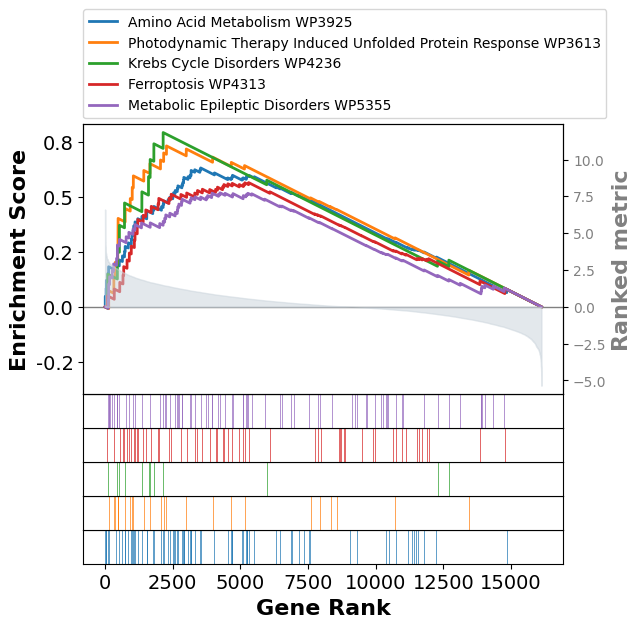

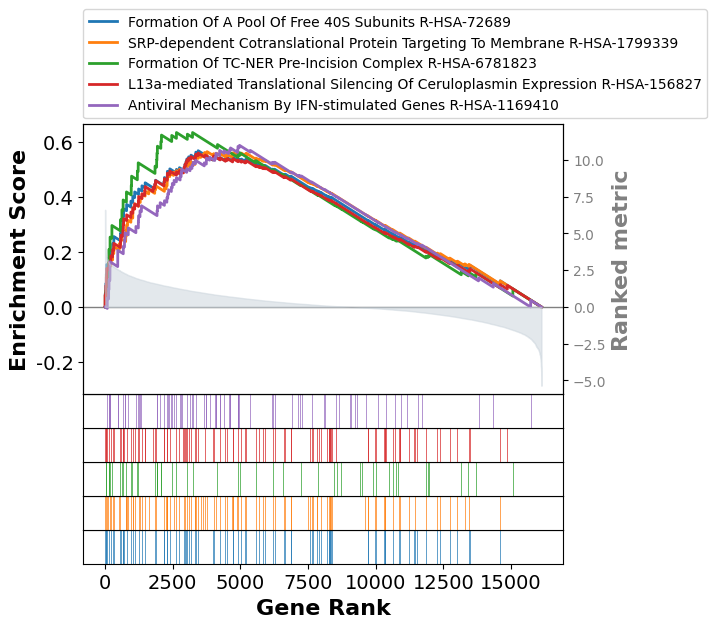

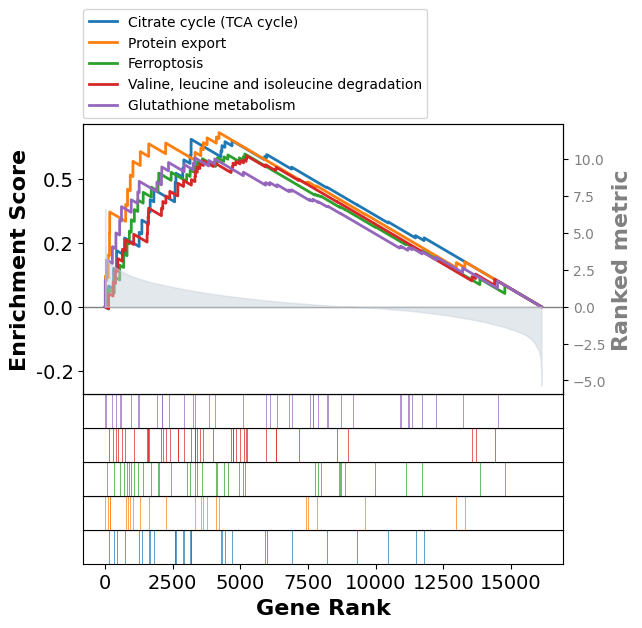

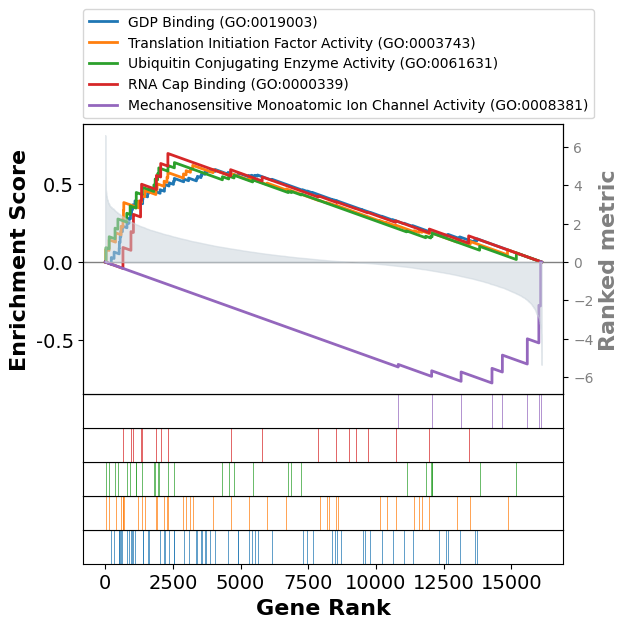

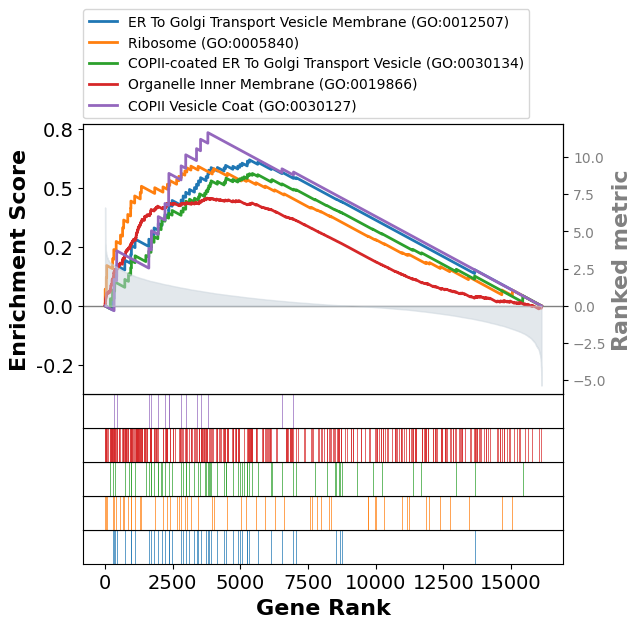

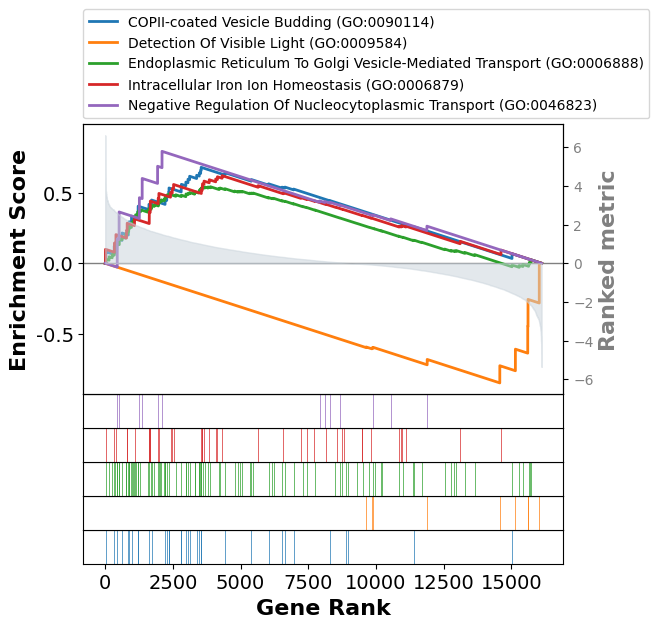

In [48]:
import gseapy as gp
from gseapy import dotplot

databases = ['WikiPathway_2023_Human', 'Reactome_2022', 'KEGG_2021_Human', 'GO_Molecular_Function_2023', 'GO_Cellular_Component_2023',
             'GO_Biological_Process_2023']

for i in databases:
    print('Databases: ', i)
    pre_res = gp.prerank(rnk=ranked_list, # or rnk = rnk,
                         gene_sets=i,
                         threads=4,
                         min_size=5,
                         max_size=1000,
                         permutation_num=1000, # reduce number to speed up testing
                         outdir=None, # don't write to disk
                         seed=6,
                         verbose=True, # see what's going on behind the scenes
                        )
    
    
    pre_res.res2d.head(5)
    pre_res.res2d.to_csv(f'./differential_expression_output/A_NCI/{i}_Gene_Set_Pre_Ranking_A_NCI.csv')
    
    terms = pre_res.res2d.Term
    #axs = pre_res.plot(terms=terms[1])
    
    
    axs = pre_res.plot(terms=terms[0:5],
                       #legend_kws={'loc': (1.2, 0)}, # set the legend loc
                       show_ranking=True, # whether to show the second yaxis
                       figsize=(3,4)
                      )
    print(terms[0:10])

In [49]:
 type(pre_res.res2d)

pandas.core.frame.DataFrame

Ranked list saved to 'ranked_list.rnk'.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17330/17330 [00:42<00:00, 406.97it/s]
2024-07-08 07:09:03,397 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-07-08 07:09:03,406 [INFO] Input gene rankings contains duplicated IDs
2024-07-08 07:09:03,408 [WARNING] Duplicated values found in preranked stats: 12.03% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-07-08 07:09:03,409 [INFO] Parsing data files for GSEA.............................
2024-07-08 07:09:03,409 [INFO] Enrichr library gene sets already downloaded in: /home/anwer/.cache/gseapy, use local file
2024-07-08 07:09:03,417 [INFO] 0047 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-07-08 07:09:03,418 [INFO] 0754 gene_sets used for further statistical testing.....
2024-07-08 07:09:03,418 [INFO] Start to run GSEA...Might ta

Databases:  WikiPathway_2023_Human


2024-07-08 07:09:13,049 [INFO] Congratulations. GSEApy runs successfully................

2024-07-08 07:09:14,357 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-07-08 07:09:14,366 [INFO] Input gene rankings contains duplicated IDs
2024-07-08 07:09:14,369 [WARNING] Duplicated values found in preranked stats: 12.03% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-07-08 07:09:14,369 [INFO] Parsing data files for GSEA.............................
2024-07-08 07:09:14,369 [INFO] Enrichr library gene sets already downloaded in: /home/anwer/.cache/gseapy, use local file
2024-07-08 07:09:14,392 [INFO] 0131 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-07-08 07:09:14,393 [INFO] 1687 gene_sets used for further statistical testing.....
2024-07-08 07:09:14,393 [INFO] Start to run GSEA...Might take a while..................


0            TYROBP Causal Network In Microglia WP3945
1    Electron Transport Chain OXPHOS System In Mito...
2                         Amino Acid Metabolism WP3925
3          Tumor Suppressor Activity Of SMARCB1 WP4204
4                      Oxidative Phosphorylation WP623
5                       GABA Receptor Signaling WP4159
6    Mitochondrial Complex I Assembly Model OXPHOS ...
7    NOTCH1 Regulation Of Endothelial Cell Calcific...
8                Cannabinoid Receptor Signaling WP3869
9    miRNA Targets In ECM And Membrane Receptors WP...
Name: Term, dtype: object
Databases:  Reactome_2022


2024-07-08 07:09:35,571 [INFO] Congratulations. GSEApy runs successfully................

2024-07-08 07:09:35,744 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-07-08 07:09:35,753 [INFO] Input gene rankings contains duplicated IDs
2024-07-08 07:09:35,755 [WARNING] Duplicated values found in preranked stats: 12.03% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-07-08 07:09:35,755 [INFO] Parsing data files for GSEA.............................
2024-07-08 07:09:35,756 [INFO] Enrichr library gene sets already downloaded in: /home/anwer/.cache/gseapy, use local file
2024-07-08 07:09:35,763 [INFO] 0003 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-07-08 07:09:35,764 [INFO] 0317 gene_sets used for further statistical testing.....
2024-07-08 07:09:35,764 [INFO] Start to run GSEA...Might take a while..................


0    Respiratory Electron Transport, ATP Synthesis ...
1    Citric Acid (TCA) Cycle And Respiratory Electr...
2                              Mitophagy R-HSA-5205647
3        COPII-mediated Vesicle Transport R-HSA-204005
4          Respiratory Electron Transport R-HSA-611105
5                 Response To Metal Ions R-HSA-5660526
6          PINK1-PRKN Mediated Mitophagy R-HSA-5205685
7       ER To Golgi Anterograde Transport R-HSA-199977
8              ISG15 Antiviral Mechanism R-HSA-1169408
9    Transport To Golgi And Subsequent Modification...
Name: Term, dtype: object
Databases:  KEGG_2021_Human


2024-07-08 07:09:40,349 [INFO] Congratulations. GSEApy runs successfully................

2024-07-08 07:09:40,564 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-07-08 07:09:40,573 [INFO] Input gene rankings contains duplicated IDs
2024-07-08 07:09:40,576 [WARNING] Duplicated values found in preranked stats: 12.03% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-07-08 07:09:40,576 [INFO] Parsing data files for GSEA.............................
2024-07-08 07:09:40,576 [INFO] Enrichr library gene sets already downloaded in: /home/anwer/.cache/gseapy, use local file
2024-07-08 07:09:40,587 [INFO] 0151 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-07-08 07:09:40,587 [INFO] 0996 gene_sets used for further statistical testing.....
2024-07-08 07:09:40,587 [INFO] Start to run GSEA...Might take a while..................


0               Oxidative phosphorylation
1               Citrate cycle (TCA cycle)
2                      Nicotine addiction
3             Aminoacyl-tRNA biosynthesis
4                       Parkinson disease
5                           Prion disease
6           Amyotrophic lateral sclerosis
7                      Huntington disease
8    Retrograde endocannabinoid signaling
9          Ubiquitin mediated proteolysis
Name: Term, dtype: object
Databases:  GO_Molecular_Function_2023


2024-07-08 07:09:52,613 [INFO] Congratulations. GSEApy runs successfully................

2024-07-08 07:09:52,730 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-07-08 07:09:52,739 [INFO] Input gene rankings contains duplicated IDs
2024-07-08 07:09:52,741 [WARNING] Duplicated values found in preranked stats: 12.03% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-07-08 07:09:52,741 [INFO] Parsing data files for GSEA.............................
2024-07-08 07:09:52,742 [INFO] Enrichr library gene sets already downloaded in: /home/anwer/.cache/gseapy, use local file
2024-07-08 07:09:52,751 [INFO] 0037 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-07-08 07:09:52,751 [INFO] 0437 gene_sets used for further statistical testing.....
2024-07-08 07:09:52,751 [INFO] Start to run GSEA...Might take a while..................


0    Transmitter-Gated Monoatomic Ion Channel Activ...
1          aminoacyl-tRNA Ligase Activity (GO:0004812)
2    Mechanosensitive Monoatomic Ion Channel Activi...
3    Ligand-Gated Monoatomic Anion Channel Activity...
4    NADH Dehydrogenase (Quinone) Activity (GO:0050...
5    NADH Dehydrogenase (Ubiquinone) Activity (GO:0...
6        2 Iron, 2 Sulfur Cluster Binding (GO:0051537)
7    Ubiquitin Conjugating Enzyme Activity (GO:0061...
8    Inhibitory Extracellular Ligand-Gated Monoatom...
9                  GABA Receptor Activity (GO:0016917)
Name: Term, dtype: object
Databases:  GO_Cellular_Component_2023


2024-07-08 07:09:58,529 [INFO] Congratulations. GSEApy runs successfully................

2024-07-08 07:09:58,698 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-07-08 07:09:58,706 [INFO] Input gene rankings contains duplicated IDs
2024-07-08 07:09:58,709 [WARNING] Duplicated values found in preranked stats: 12.03% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-07-08 07:09:58,709 [INFO] Parsing data files for GSEA.............................
2024-07-08 07:09:58,709 [INFO] Enrichr library gene sets already downloaded in: /home/anwer/.cache/gseapy, use local file
2024-07-08 07:09:58,747 [INFO] 0577 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-07-08 07:09:58,747 [INFO] 4830 gene_sets used for further statistical testing.....
2024-07-08 07:09:58,748 [INFO] Start to run GSEA...Might take a while..................


0                             Microvillus (GO:0005902)
1                Organelle Inner Membrane (GO:0019866)
2            Mitochondrial Inner Membrane (GO:0005743)
3    Proton-Transporting V-type ATPase, V1 Domain (...
4    Vacuolar Proton-Transporting V-type ATPase, V1...
5    Vacuolar Proton-Transporting V-type ATPase Com...
6                  Mitochondrial Membrane (GO:0031966)
7                       Neuron Projection (GO:0043005)
8              Transport Vesicle Membrane (GO:0030658)
9    Proton-Transporting ATP Synthase Complex (GO:0...
Name: Term, dtype: object
Databases:  GO_Biological_Process_2023


2024-07-08 07:10:55,966 [INFO] Congratulations. GSEApy runs successfully................



0    Proton Motive Force-Driven ATP Synthesis (GO:0...
1            Regulation Of Macroautophagy (GO:0016241)
2                    Cellular Respiration (GO:0045333)
3                     Heart Morphogenesis (GO:0003007)
4    Energy Derivation By Oxidation Of Organic Comp...
5    Regulation Of Cardiac Muscle Contraction By Ca...
6              Mitochondrion Organization (GO:0007005)
7    Negative Regulation Of miRNA Transcription (GO...
8    tRNA Aminoacylation For Protein Translation (G...
9    Establishment Of Melanosome Localization (GO:0...
Name: Term, dtype: object


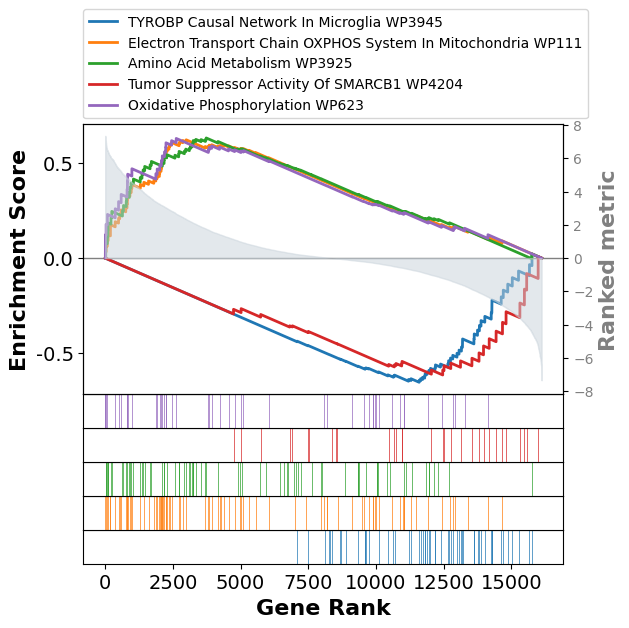

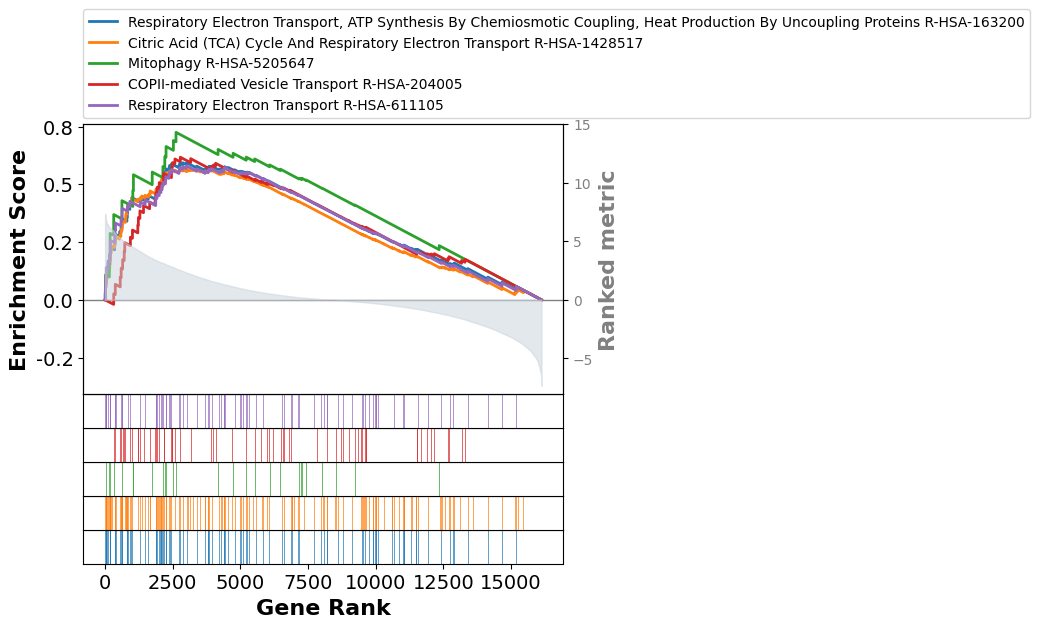

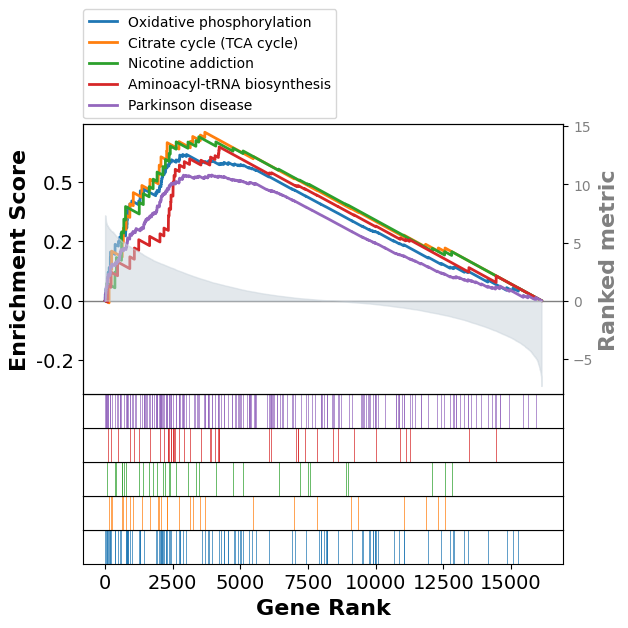

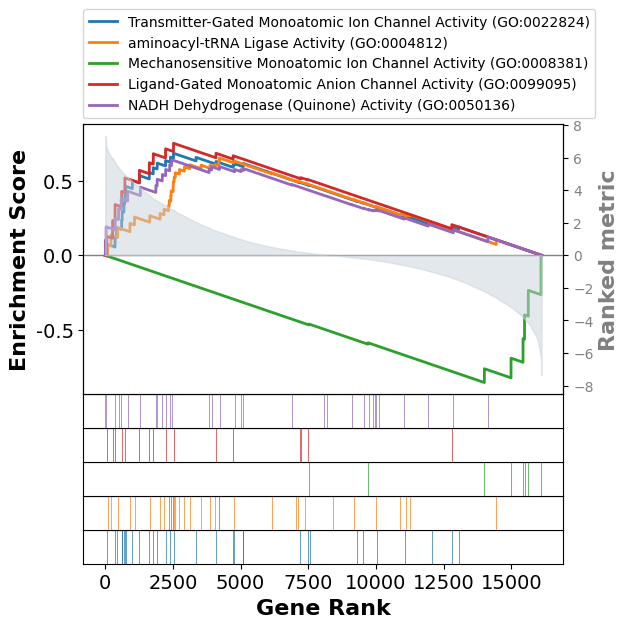

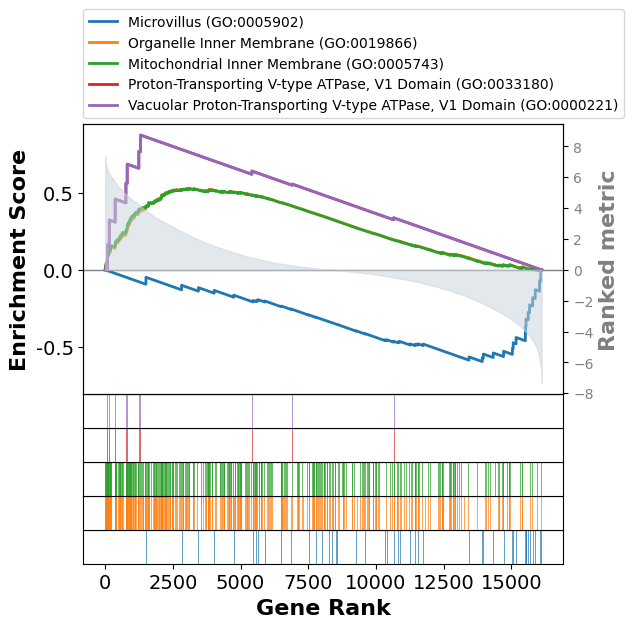

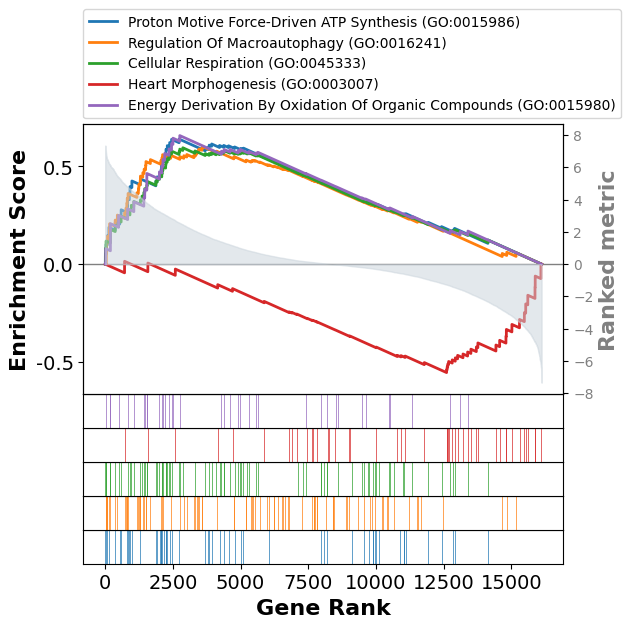

In [55]:
import pandas as pd
import numpy as np

# Load your DESeq2 results into a DataFrame
df = result_analysis_B_NCI

# Filter out rows with NA values in 'padj' and 'log2FoldChange' columns
df = df.dropna(subset=['padj', 'log2FoldChange'])

# Calculate the ranking metric
df['ranking_metric'] = -np.log10(df['padj']) * np.sign(df['log2FoldChange'])

# Sort the DataFrame by the ranking metric in descending order
df_sorted = df.sort_values(by='ranking_metric', ascending=False)
df_sorted
# Select the columns for the ranked list
ranked_list = df_sorted[['ranking_metric']]

# Save the ranked list to a file
ranked_list.to_csv("./differential_expression_output/B_NCI/ranked_list_B_NCI.rnk", sep="\t", index=True, header=False)

print("Ranked list saved to 'ranked_list.rnk'.")


x = [return_gene_name(i) for i in tqdm(ranked_list.index)]
ranked_list.index = x
ranked_list = ranked_list.rename(columns={'ranking_metric':1})
ranked_list

import gseapy as gp
from gseapy import dotplot

databases = ['WikiPathway_2023_Human', 'Reactome_2022', 'KEGG_2021_Human', 'GO_Molecular_Function_2023', 'GO_Cellular_Component_2023',
             'GO_Biological_Process_2023']

for i in databases:

    print('Databases: ', i)
    pre_res = gp.prerank(rnk=ranked_list, # or rnk = rnk,
                         gene_sets=i,
                         threads=4,
                         min_size=5,
                         max_size=1000,
                         permutation_num=1000, # reduce number to speed up testing
                         outdir=None, # don't write to disk
                         seed=6,
                         verbose=True, # see what's going on behind the scenes
                        )
    
    
    pre_res.res2d.head(5)
    pre_res.res2d.to_csv(f'./differential_expression_output/B_NCI/{i}_Gene_Set_Pre_Ranking_B_NCI.csv')
    
    terms = pre_res.res2d.Term
    #axs = pre_res.plot(terms=terms[1])
    
    
    axs = pre_res.plot(terms=terms[0:5],
                       #legend_kws={'loc': (1.2, 0)}, # set the legend loc
                       show_ranking=True, # whether to show the second yaxis
                       figsize=(3,4)
                      )
    print(terms[0:10])

In [51]:
ranked_list

,ranking_metric
ENSG00000163634,7.342576
ENSG00000115540,7.342576
ENSG00000198612,7.342576
ENSG00000165678,7.342576
ENSG00000136521,7.342576
...,...
ENSG00000180423,-7.053160
ENSG00000196169,-7.092302
ENSG00000188786,-7.214285
ENSG00000135678,-7.278030


Ranked list saved to 'ranked_list.rnk'.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17330/17330 [00:42<00:00, 411.36it/s]
2024-07-08 07:11:39,572 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-07-08 07:11:39,581 [INFO] Input gene rankings contains duplicated IDs
2024-07-08 07:11:39,583 [WARNING] Duplicated values found in preranked stats: 21.14% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-07-08 07:11:39,583 [INFO] Parsing data files for GSEA.............................
2024-07-08 07:11:39,583 [INFO] Enrichr library gene sets already downloaded in: /home/anwer/.cache/gseapy, use local file
2024-07-08 07:11:39,592 [INFO] 0047 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-07-08 07:11:39,592 [INFO] 0754 gene_sets used for further statistical testing.....
2024-07-08 07:11:39,592 [INFO] Start to run GSEA...Might ta

Databases:  WikiPathway_2023_Human


2024-07-08 07:11:48,913 [INFO] Congratulations. GSEApy runs successfully................

2024-07-08 07:11:49,850 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-07-08 07:11:49,859 [INFO] Input gene rankings contains duplicated IDs
2024-07-08 07:11:49,861 [WARNING] Duplicated values found in preranked stats: 21.14% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-07-08 07:11:49,861 [INFO] Parsing data files for GSEA.............................
2024-07-08 07:11:49,861 [INFO] Enrichr library gene sets already downloaded in: /home/anwer/.cache/gseapy, use local file
2024-07-08 07:11:49,884 [INFO] 0131 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-07-08 07:11:49,885 [INFO] 1687 gene_sets used for further statistical testing.....
2024-07-08 07:11:49,885 [INFO] Start to run GSEA...Might take a while..................


0                         Amino Acid Metabolism WP3925
1                 Glycolysis And Gluconeogenesis WP534
2                 Metabolic Epileptic Disorders WP5355
3       Metabolic Reprogramming In Colon Cancer WP4290
4        TCA Cycle Aka Krebs Or Citric Acid Cycle WP78
5                       GABA Receptor Signaling WP4159
6                                   Ferroptosis WP4313
7                 Target Of Rapamycin Signaling WP1471
8           17P13 3 YWHAE Copy Number Variation WP5376
9    Metabolic Reprogramming In Pancreatic Cancer W...
Name: Term, dtype: object
Databases:  Reactome_2022


2024-07-08 07:12:11,030 [INFO] Congratulations. GSEApy runs successfully................

2024-07-08 07:12:11,145 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-07-08 07:12:11,154 [INFO] Input gene rankings contains duplicated IDs
2024-07-08 07:12:11,157 [WARNING] Duplicated values found in preranked stats: 21.14% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-07-08 07:12:11,157 [INFO] Parsing data files for GSEA.............................
2024-07-08 07:12:11,157 [INFO] Enrichr library gene sets already downloaded in: /home/anwer/.cache/gseapy, use local file
2024-07-08 07:12:11,165 [INFO] 0003 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-07-08 07:12:11,165 [INFO] 0317 gene_sets used for further statistical testing.....
2024-07-08 07:12:11,166 [INFO] Start to run GSEA...Might take a while..................


0    Formation Of TC-NER Pre-Incision Complex R-HSA...
1    Regulation Of RUNX1 Expression And Activity R-...
2    Post-transcriptional Silencing By Small RNAs R...
3                         Macroautophagy R-HSA-1632852
4    Transport To Golgi And Subsequent Modification...
5                              Mitophagy R-HSA-5205647
6       ER To Golgi Anterograde Transport R-HSA-199977
7    Mitochondrial Calcium Ion Transport R-HSA-8949215
8    Pyruvate Metabolism And Citric Acid (TCA) Cycl...
9        COPII-mediated Vesicle Transport R-HSA-204005
Name: Term, dtype: object
Databases:  KEGG_2021_Human


2024-07-08 07:12:15,743 [INFO] Congratulations. GSEApy runs successfully................

2024-07-08 07:12:15,974 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-07-08 07:12:15,983 [INFO] Input gene rankings contains duplicated IDs
2024-07-08 07:12:15,986 [WARNING] Duplicated values found in preranked stats: 21.14% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-07-08 07:12:15,986 [INFO] Parsing data files for GSEA.............................
2024-07-08 07:12:15,986 [INFO] Enrichr library gene sets already downloaded in: /home/anwer/.cache/gseapy, use local file
2024-07-08 07:12:15,998 [INFO] 0151 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-07-08 07:12:15,998 [INFO] 0996 gene_sets used for further statistical testing.....
2024-07-08 07:12:15,998 [INFO] Start to run GSEA...Might take a while..................


0                     Citrate cycle (TCA cycle)
1                           Pyruvate metabolism
2                                     Autophagy
3                                Protein export
4                             Parkinson disease
5                 Amyotrophic lateral sclerosis
6                                 Prion disease
7                         Amphetamine addiction
8                          Butanoate metabolism
9    Valine, leucine and isoleucine degradation
Name: Term, dtype: object
Databases:  GO_Molecular_Function_2023


2024-07-08 07:12:28,067 [INFO] Congratulations. GSEApy runs successfully................

2024-07-08 07:12:28,149 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-07-08 07:12:28,157 [INFO] Input gene rankings contains duplicated IDs
2024-07-08 07:12:28,160 [WARNING] Duplicated values found in preranked stats: 21.14% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-07-08 07:12:28,160 [INFO] Parsing data files for GSEA.............................
2024-07-08 07:12:28,160 [INFO] Enrichr library gene sets already downloaded in: /home/anwer/.cache/gseapy, use local file
2024-07-08 07:12:28,170 [INFO] 0037 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-07-08 07:12:28,170 [INFO] 0437 gene_sets used for further statistical testing.....
2024-07-08 07:12:28,170 [INFO] Start to run GSEA...Might take a while..................


0                             GDP Binding (GO:0019003)
1    Transmitter-Gated Monoatomic Ion Channel Activ...
2    Ribonucleoside Triphosphate Phosphatase Activi...
3                 Signal Sequence Binding (GO:0005048)
4                         GTPase Activity (GO:0003924)
5    Mechanosensitive Monoatomic Ion Channel Activi...
6    Neurotransmitter Receptor Activity Involved In...
7    Translation Initiation Factor Activity (GO:000...
8    Transition Metal Ion Transmembrane Transporter...
9    Inward Rectifier Potassium Channel Activity (G...
Name: Term, dtype: object
Databases:  GO_Cellular_Component_2023


2024-07-08 07:12:33,945 [INFO] Congratulations. GSEApy runs successfully................

2024-07-08 07:12:34,114 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-07-08 07:12:34,123 [INFO] Input gene rankings contains duplicated IDs
2024-07-08 07:12:34,125 [WARNING] Duplicated values found in preranked stats: 21.14% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-07-08 07:12:34,125 [INFO] Parsing data files for GSEA.............................
2024-07-08 07:12:34,126 [INFO] Enrichr library gene sets already downloaded in: /home/anwer/.cache/gseapy, use local file
2024-07-08 07:12:34,164 [INFO] 0577 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-07-08 07:12:34,164 [INFO] 4830 gene_sets used for further statistical testing.....
2024-07-08 07:12:34,164 [INFO] Start to run GSEA...Might take a while..................


0                Organelle Inner Membrane (GO:0019866)
1                  Tertiary Granule Lumen (GO:1904724)
2    Vacuolar Proton-Transporting V-type ATPase Com...
3            Mitochondrial Inner Membrane (GO:0005743)
4                Golgi-associated Vesicle (GO:0005798)
5                  Mitochondrial Membrane (GO:0031966)
6    Endoplasmic Reticulum Tubular Network (GO:0071...
7                            Vesicle Coat (GO:0030120)
8    Proton-Transporting V-type ATPase Complex (GO:...
9    Proton-Transporting V-type ATPase, V1 Domain (...
Name: Term, dtype: object
Databases:  GO_Biological_Process_2023


2024-07-08 07:13:31,135 [INFO] Congratulations. GSEApy runs successfully................



0            COPII-coated Vesicle Budding (GO:0090114)
1              Pyruvate Metabolic Process (GO:0006090)
2        Cholesterol Biosynthetic Process (GO:0006695)
3    Response To Endoplasmic Reticulum Stress (GO:0...
4                 Mitochondrial Transport (GO:0006839)
5    Regulation Of Protein Dephosphorylation (GO:00...
6            Regulation Of Macroautophagy (GO:0016241)
7              Mitochondrion Organization (GO:0007005)
8    Establishment Of Protein Localization To Endop...
9                   Mitochondrial Fission (GO:0000266)
Name: Term, dtype: object


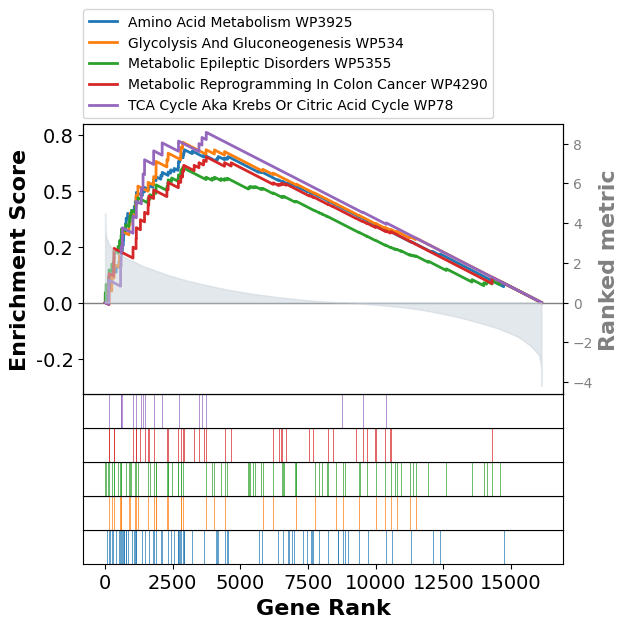

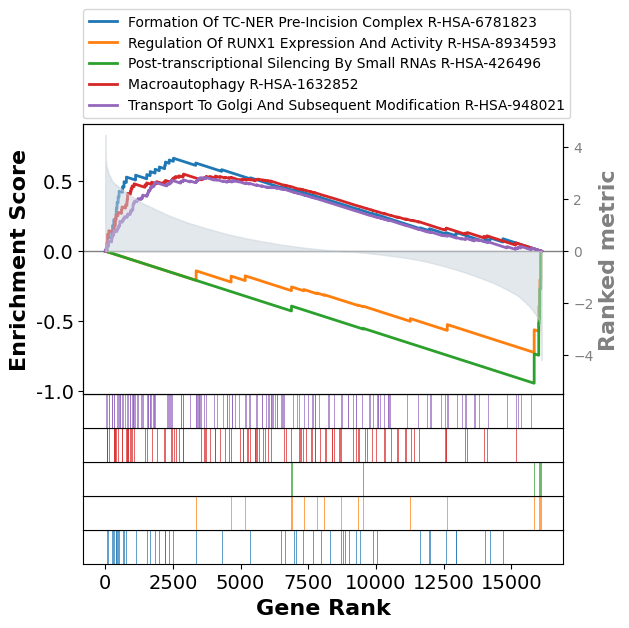

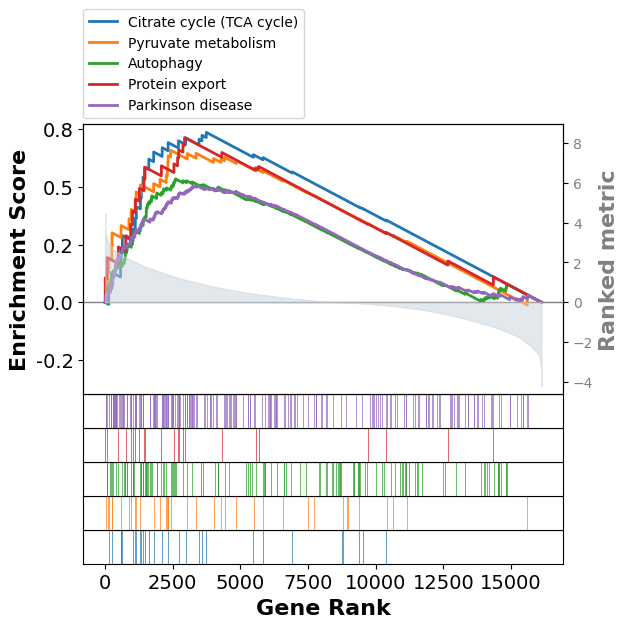

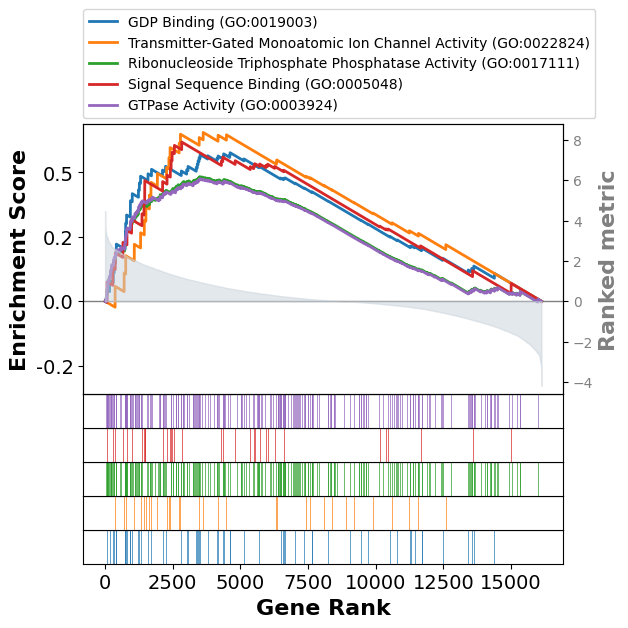

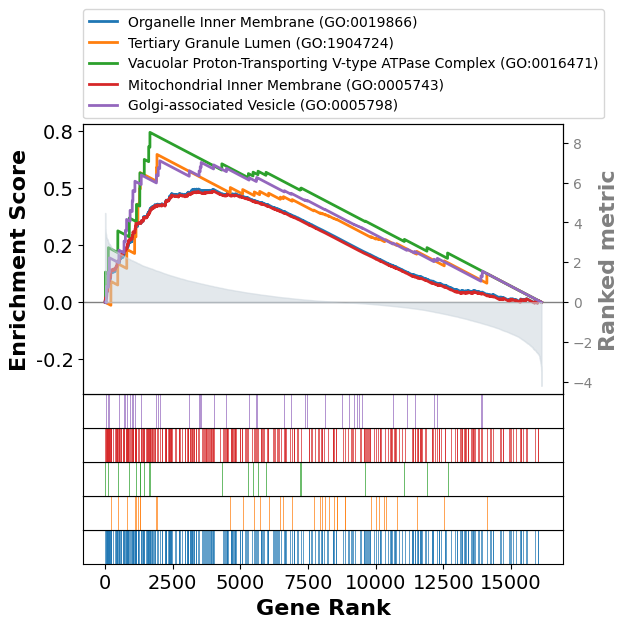

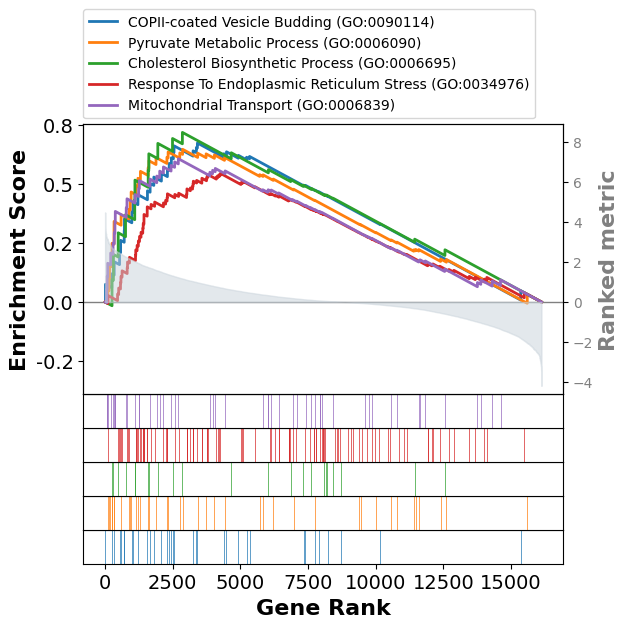

In [56]:
import pandas as pd
import numpy as np

# Load your DESeq2 results into a DataFrame
df = result_analysis_C_NCI
# Filter out rows with NA values in 'padj' and 'log2FoldChange' columns
df = df.dropna(subset=['padj', 'log2FoldChange'])

# Calculate the ranking metric
df['ranking_metric'] = -np.log10(df['padj']) * np.sign(df['log2FoldChange'])

# Sort the DataFrame by the ranking metric in descending order
df_sorted = df.sort_values(by='ranking_metric', ascending=False)
df_sorted
# Select the columns for the ranked list
ranked_list = df_sorted[['ranking_metric']]

# Save the ranked list to a file
ranked_list.to_csv("./differential_expression_output/C_NCI/ranked_list_C_NCI.rnk", sep="\t", index=True, header=False)


print("Ranked list saved to 'ranked_list.rnk'.")
x = [return_gene_name(i) for i in tqdm(ranked_list.index)]
ranked_list.index = x
ranked_list = ranked_list.rename(columns={'ranking_metric':1})
ranked_list


import gseapy as gp
from gseapy import dotplot

databases = ['WikiPathway_2023_Human', 'Reactome_2022', 'KEGG_2021_Human', 'GO_Molecular_Function_2023', 'GO_Cellular_Component_2023',
             'GO_Biological_Process_2023']

for i in databases:
    print('Databases: ', i)
    pre_res = gp.prerank(rnk=ranked_list, # or rnk = rnk,
                         gene_sets=i,
                         threads=4,
                         min_size=5,
                         max_size=1000,
                         permutation_num=1000, # reduce number to speed up testing
                         outdir=None, # don't write to disk
                         seed=6,
                         verbose=True, # see what's going on behind the scenes
                        )
    
    
    pre_res.res2d.head(5)
    pre_res.res2d.to_csv(f'./differential_expression_output/C_NCI/{i}_Gene_Set_Pre_Ranking_C_NCI.csv')
    
    terms = pre_res.res2d.Term
    #axs = pre_res.plot(terms=terms[1])
    
    
    axs = pre_res.plot(terms=terms[0:5],
                       #legend_kws={'loc': (1.2, 0)}, # set the legend loc
                       show_ranking=True, # whether to show the second yaxis
                       figsize=(3,4)
                      )
    print(terms[0:10])